[4.40266666 0.4942857 ] 0.07228190476190996
[ 4.0060026   1.48594606 -0.4722195 ] 0.004848571432001964
[ 3.81000121  2.30779827 -1.37962274  0.28806357] 0.0009285714290105776
[ 4.94041451 12.01361589 10.46157319  0.22289451] 0.38416910863339604
[4.43215436 0.09858171] 0.07939596356118656


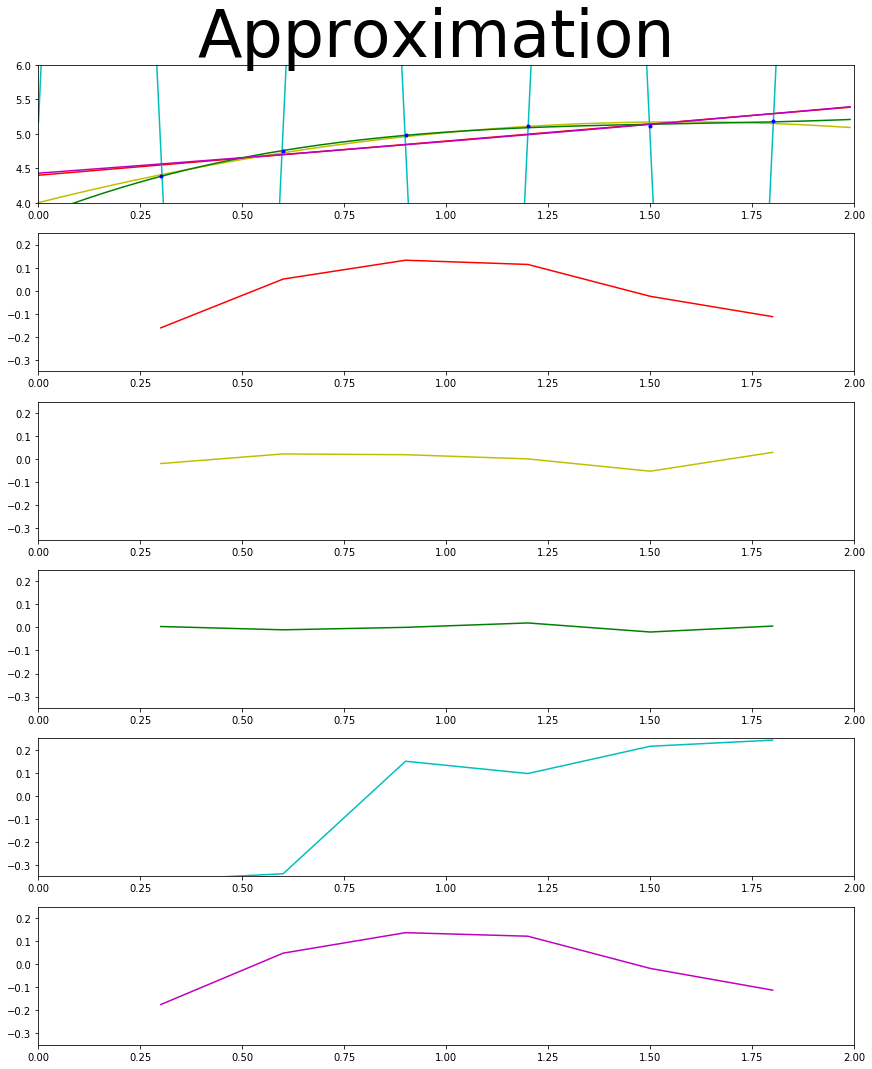

In [2]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

def y1_3(x, a):
    summ = 0
    for i in range(len(a)):
        summ += (a[i] * (x**i))
    return summ

def y4(x, a):
    return a[0] + a[1] * np.sin(a[2] * x) + a[3] * np.cos(a[2] * x)

def y5(x, a):
    return a[0] * np.exp(a[1] * x)

def phi(a):
    global x, y
    summ = 0
    for i in range(len(x)):
        summ += (y[i] - y1_3(x[i], a))**2
    return summ

def phi4(a):
    global x, y
    summ = 0
    for i in range(len(x)):
        summ += (y[i] - y4(x[i], a))**2
    return summ

def phi5(a):
    global x, y
    summ = 0
    for i in range(len(x)):
        summ += (y[i] - y5(x[i], a))**2
    return summ

ax = np.arange(0.0, 2.0, 0.01)
x = np.array([0.3, 0.6, 0.9, 1.2, 1.5, 1.8])
y = np.array([4.39, 4.75, 4.98, 5.11, 5.12, 5.18])

fig, axs = plt.subplots(6, figsize=tuple((12.0, 15.0)), constrained_layout=True)

fig.suptitle("Approximation", fontsize=65.0)

a0 = np.array([10.0, 10.0])
result1 = optimize.minimize(fun=phi, x0=a0, tol=1e-5).x
r1 = [y1_3(i, result1) for i in x]
ay1 = np.array([y1_3(i, result1) for i in ax])
a0 = np.array([10.0, 10.0, 10.0])
result2 = optimize.minimize(fun=phi, x0=a0, tol=1e-5).x
r2 = [y1_3(i, result2) for i in x]
ay2 = np.array([y1_3(i, result2) for i in ax])
a0 = np.array([10.0, 10.0, 10.0, 10.0])
result3 = optimize.minimize(fun=phi, x0=a0, tol=1e-5).x
r3 = [y1_3(i, result3) for i in x]
ay3 = np.array([y1_3(i, result3) for i in ax])
a0 = np.array([10.0, 10.0, 10.0, 10.0])
result4 = optimize.minimize(fun=phi4, x0=a0, tol=1e-5).x
r4 = [y4(i, result4) for i in x]
ay4 = np.array([y4(i, result4) for i in ax])
a0 = np.array([1.0, 1.0])
result5 = optimize.minimize(fun=phi5, x0=a0, tol=1e-5).x
r5 = [y5(i, result5) for i in x]
ay5 = np.array([y5(i, result5) for i in ax])

# axs[4].axis([0.0, 2.0, 0.0, 10])
# axs[0].plot(ax, ay1, 'r')
# axs[1].plot(ax, ay2, 'y')
# axs[2].plot(ax, ay3, 'g')
# axs[3].plot(ax, ay4, 'c')
# axs[4].plot(ax, ay5, 'm')
# axs[0].plot(x, y, 'b.')
# axs[1].plot(x, y, 'b.')
# axs[2].plot(x, y, 'b.')
# axs[3].plot(x, y, 'b.')
# axs[4].plot(x, y, 'b.')
# axs[0].grid(True)
# axs[1].grid(True)
# axs[2].grid(True)
# axs[3].grid(True)
# axs[4].grid(True)
# axs[0].set_title('y = b0 + b1 * x', fontsize=14)
# axs[1].set_title('y = b0 + b1 * x + b2 * x ** 2', fontsize=14)
# axs[2].set_title('y = b0 + b1 * x + b2 * x ** 2 + b3 * x ** 3', fontsize=14)
# axs[3].set_title('y = b0 + b1 * sin(b2 * x) + b3 * sin(b2 * x)', fontsize=14)
# axs[4].set_title('y = b0 * exp(b1 * x)', fontsize=14)
# axs[5].plot(x, y-r1, 'r')
# axs[5].plot(x, y-r2, 'y')
# axs[5].plot(x, y-r3, 'g')
# axs[5].plot(x, y-r4, 'c')
# axs[5].plot(x, y-r5, 'm')

axs[0].axis([0.0, 2.0, 4.0, 6.0])
axs[0].plot(ax, ay1, 'r')
axs[0].plot(ax, ay2, 'y')
axs[0].plot(ax, ay3, 'g')
axs[0].plot(ax, ay4, 'c')
axs[0].plot(ax, ay5, 'm')
axs[0].plot(x, y, 'b.')

axs[1].axis([0.0, 2.0, -0.35, 0.25])
axs[2].axis([0.0, 2.0, -0.35, 0.25])
axs[3].axis([0.0, 2.0, -0.35, 0.25])
axs[4].axis([0.0, 2.0, -0.35, 0.25])
axs[5].axis([0.0, 2.0, -0.35, 0.25])

axs[1].plot(x, y-r1, 'r')
axs[2].plot(x, y-r2, 'y')
axs[3].plot(x, y-r3, 'g')
axs[4].plot(x, y-r4, 'c')
axs[5].plot(x, y-r5, 'm')

plt.plot()
plt.savefig("approximation.pdf", format="pdf")
print(result1, phi(result1))
print(result2, phi(result2))
print(result3, phi(result3))
print(result4, phi4(result4))
print(result5, phi5(result5))